In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import count_nonzero

In [2]:
data = pd.read_csv('take_home_ss_ratings.csv')
print(data.head())
data.info()

   user_id quiz_type  quiz_number  question_number  item_id  rating
0        0    random            0                0       45       1
1        0    random            0                1      734       1
2        0    random            0                2     4145       1
3        0    random            0                3     3231       0
4        0    random            0                4      361       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116370 entries, 0 to 1116369
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   user_id          1116370 non-null  int64 
 1   quiz_type        1116370 non-null  object
 2   quiz_number      1116370 non-null  int64 
 3   question_number  1116370 non-null  int64 
 4   item_id          1116370 non-null  int64 
 5   rating           1116370 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 51.1+ MB


In [3]:
data['quiz_type'].astype('category')
data['quiz_type'].replace(['random','personalized'],[0,1], inplace = True)
data.head()

,user_id,quiz_type,quiz_number,question_number,item_id,rating
0,0,0,0,0,45,1
1,0,0,0,1,734,1
2,0,0,0,2,4145,1
3,0,0,0,3,3231,0
4,0,0,0,4,361,1


In [4]:
data.describe()

,user_id,quiz_type,quiz_number,question_number,item_id,rating
count,1.116370e+06,1.116370e+06,1.116370e+06,1.116370e+06,1.116370e+06,1.116370e+06
mean,1.008252e+04,3.013786e-01,5.424322e+00,5.874322e+01,2.491401e+03,5.608651e-01
std,5.777667e+03,4.588570e-01,6.631367e+00,6.637585e+01,1.443483e+03,4.962818e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.111000e+03,0.000000e+00,1.000000e+00,1.500000e+01,1.246000e+03,0.000000e+00
50%,1.010400e+04,0.000000e+00,3.000000e+00,3.700000e+01,2.482000e+03,1.000000e+00
75%,1.506400e+04,1.000000e+00,7.000000e+00,7.900000e+01,3.743000e+03,1.000000e+00
max,1.999900e+04,1.000000e+00,1.030000e+02,1.039000e+03,4.999000e+03,1.000000e+00


In [7]:
print(len(data))
data.isnull().sum()

1116370


user_id            0
quiz_type          0
quiz_number        0
question_number    0
item_id            0
rating             0
dtype: int64

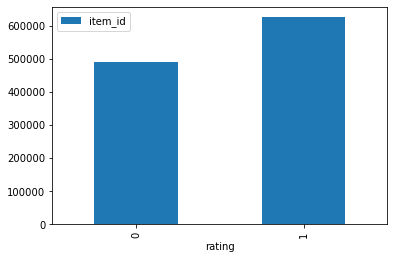

In [11]:
data.groupby(by = 'rating').count().plot.bar( y = 'item_id')
plt.savefig(r'Figures/ratings.jpg', dpi = 300)

In [31]:
data.loc[data['item_id'] == 45].groupby('quiz_type').count()6

,user_id,quiz_number,question_number,item_id,rating
quiz_type,,,,,
0,160,160,160,160,160
1,102,102,102,102,102


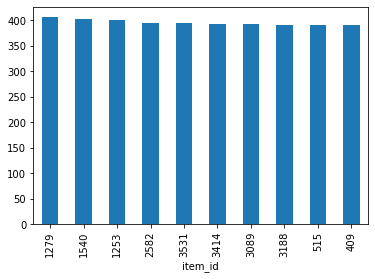

In [30]:
highest_rated_items = data.groupby('item_id')['rating'].count().sort_values(ascending=False).head(10)
highest_rated_items.plot.bar()
plt.savefig(r'Figures/highest_rated.jpg', dpi = 300)
plt.show()

KeyboardInterrupt: 

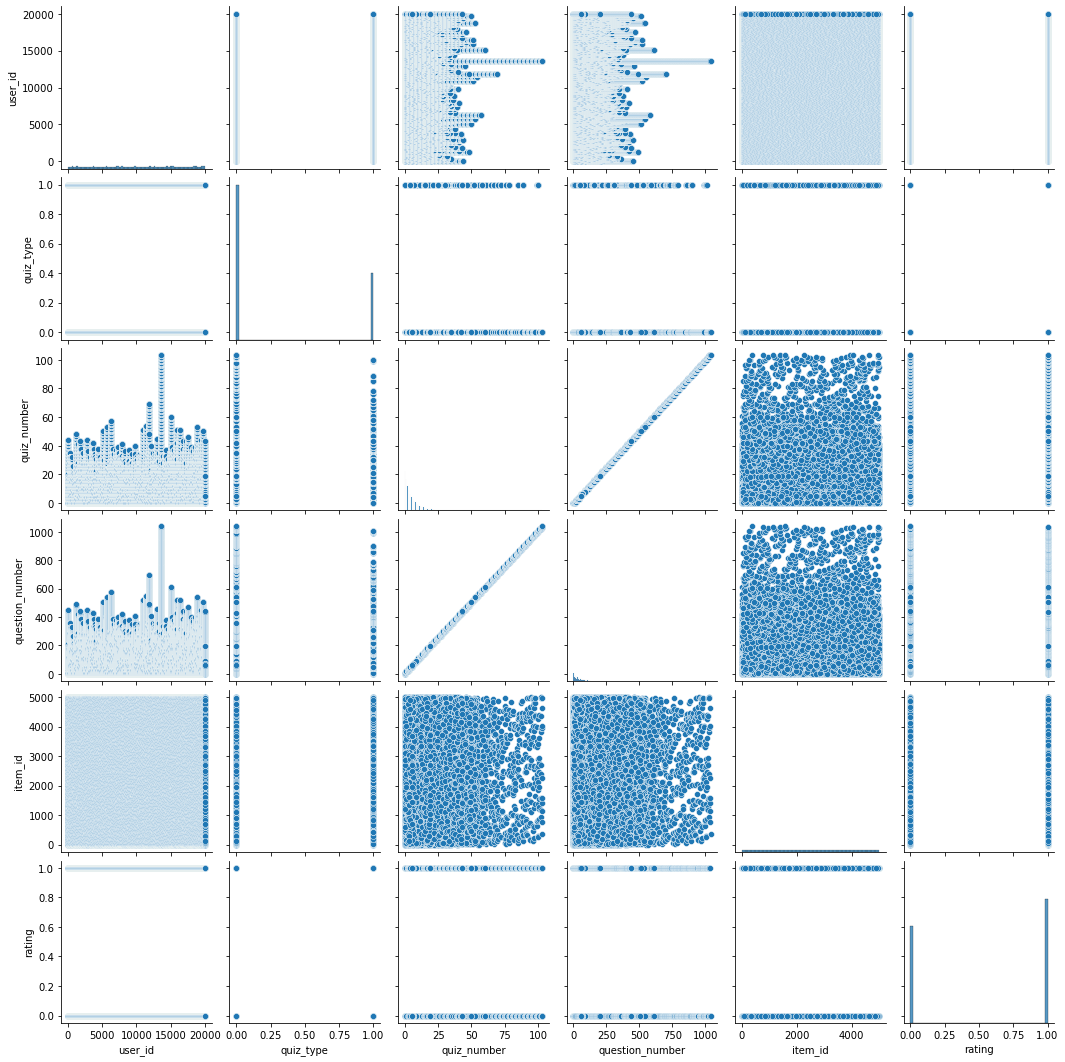

In [31]:
sns.pairplot(data)
plt.savefig(r'Figures/pairplot.jpg', dpi = 300)
plt.show()

In [9]:
user_rating = pd.pivot_table(data, index = 'user_id', columns= 'item_id', values= "rating").fillna(0)
user_rating.head(10)

item_id,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
n_users = len(user_rating.index)
n_items = len(user_rating.columns)
print(f"Users:{n_users}\nItems:{n_items}")

Users:20000
Items:5000


In [11]:
users_item_matrix = user_rating.values
users_item_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
sparsity = 1 - (count_nonzero(users_item_matrix)/ float(users_item_matrix.size))
print(sparsity)

0.9938027


In [62]:
anomaly = []
for user in user_rating.index.tolist():
    if user_rating.iloc[user].sum() == 0:
        anomaly.append(user)

In [64]:
len(anomaly)

215